1. Sample $10^4$ points uniformly over the hypercube $[0,1]^d$ (denote this set by $\mathcal X$).
2. For $d\in\{1,2,3,5,10,20,50,100,500\}$ and for the Euclidean distance $\rho$ find
- $\min d(x,\tilde x)$: minimum over $x,\tilde x\in \mathcal X$
- $\overline{d(x,\tilde x)}$: average over $x,\tilde x\in \mathcal X$
- $\max d(x,\tilde x)$: maximum over $x,\tilde x\in \mathcal X$
- $\overline{d_{NN1}(x)}$: average distance to the nearest neighbor
- $ \max d_{NN1}(x)$: maximal distance to the nearest neigbor 

Collect the results in a table

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB

In [91]:
n = 10**4
dimension = [1,2,3,5,10,20,50,100,500] 
df=pd.DataFrame()
for d in dimension:
    X=np.random.uniform(0,1,(n,d))
    #X1, X2 = np.meshgrid(X, X) 
    #p = abs(X1-X2)
    #требует СЛИКШОМ много памяти,  посчитал только для n = 10 и 100
    p = []
    for row in X:
        dist = np.sqrt(np.sum((X - row)**2, axis=1))
        p.append(dist)
    p = np.delete(np.sort(np.array(p)), 0, 1)
    #print(distance)
    average_nearest = np.amin(p,axis=1).mean() #по строкам
    #print(average_nearest)
    maximal_nearest = np.amin(p,axis=1).max()
    new_row = {'d': d, 'min': p.min(), 'mean': p.mean(), 'max': p.max(), 'average_nearest': average_nearest, 'maximal_nearest': maximal_nearest} 
    df = df.append(new_row, ignore_index=True)
print(df)

       d           min      mean        max  average_nearest  maximal_nearest
0    1.0  3.837704e-09  0.335705   0.999944         0.000050         0.000503
1    2.0  1.042559e-04  0.520209   1.397728         0.005010         0.018668
2    3.0  2.237770e-03  0.660788   1.663733         0.025787         0.066764
3    5.0  1.510871e-02  0.879736   1.979714         0.109921         0.242490
4   10.0  1.564440e-01  1.267110   2.452571         0.388324         0.633137
5   20.0  5.622987e-01  1.811274   3.072313         0.897435         1.174170
6   50.0  1.580656e+00  2.875086   4.158169         1.969929         2.316576
7  100.0  2.755537e+00  4.072921   5.386393         3.180921         3.646845
8  500.0  7.801825e+00  9.123756  10.685319         8.244911         8.621421


3. Generate $10^4$ point such that each point with probability $1/2$
- is sampled from $N(\mu,I)$, $\mu=(a,\dots,a)\in\mathbb R^d$ and gets label $0$
- is sampled from $N(\mu,I)$, $\mu=(-a,\dots,-a)\in\mathbb R^d$ and gets label $1$

Put $a=\frac{2}{\sqrt{d}}$ (the Bayes error will be $\approx 0.023$ for all $d$). 

For $k = 3, 7, 15$  train a $k$-NN classifier for increasing dimensions $1\le d\le 500$ and monitor its performance evaluated by 10 times repeated 10-fold CV. For each $k$ draw the graphs of the mean  missclassification error as a function of $d$.

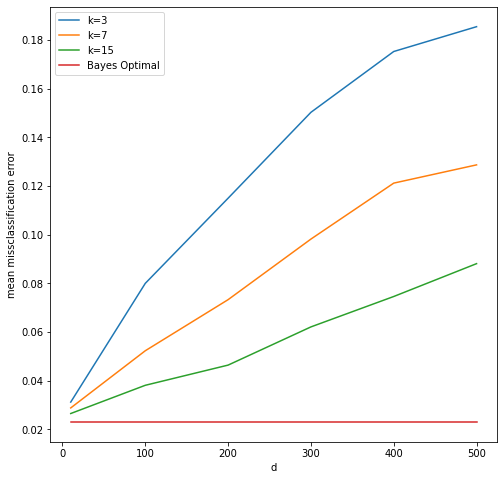

In [2]:
n = 10**4

fig, ax = plt.subplots(1,1, figsize=(8, 8))
ax.set_xlabel('d')
ax.set_ylabel('mean missclassification error')

arr_k = [3,7,15]
arr_d = [10,100,200,300,400,500]
for k in arr_k:
    res = []
    for d in arr_d:
        a =2.0/np.sqrt(d)
        X = np.random.normal(0,1,(n,d))
        Y = np.random.randint(0,2,(n,1))
        for i in range(len(X)):
            if Y[i] == 1:
                X[i] += a
            else: 
                X[i] -= a
        #print(Y) 
        #print(np.pad(Y, ((0,n)),'constant')) 
        Y = np.ones((n,d)) * Y
        clf = KNeighborsClassifier(n_neighbors = k)
        scores = cross_val_score(clf, X, Y, cv=10)
        res.append(np.mean(1 - scores))
    ax.plot(arr_d, res, label='k='+str(k))
    ax.legend(loc=0)
ax.plot(arr_d, np.zeros(len(arr_d)) + 0.023, label='Bayes Optimal')
ax.legend(loc=0)
